In [32]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import xlens.catalog.model as xmod

from xlens.catalog.model import w_model, w_model_derivs

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/work/xiangchong.li/miniconda3/envs/image/lib/python3.11/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['trace', 'vstack']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [37]:
data = Table.read("/gpfs02/work/xiangchong.li/work/image_tests/hsc_s23b/s23b_sim/anacal/sim_g1p.fits")
R = np.average(data["fpfs_e1"] * data["dwsel_dg1"] + data["fpfs_de1_dg1"] * data["wsel"])
e1 = data["fpfs_e1"] * data["wsel"] / R

In [38]:
trace = (data["fpfs_m2"] /  data["fpfs_m0"])
mag_zero = 30.0
mag = mag_zero - 2.5 * np.log10(data["i_flux"])

In [7]:
if False:
    mask = mag < 24.5
    R_o = np.average((data["fpfs_e1"] * data["dwsel_dg1"] + data["fpfs_de1_dg1"] * data["wsel"])[mask])
    e1_o = (data["fpfs_e1"] * data["wsel"] / R_o)[mask]
    print(np.nanstd(e1_o))

0.28221745106454665


/tmp/ipykernel_31056/1648076045.py:4: RuntimeWarning: invalid value encountered in sqrt
  mag=mag, radius=np.sqrt(trace / 2.0),
/work/xiangchong.li/miniconda3/envs/image/lib/python3.11/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


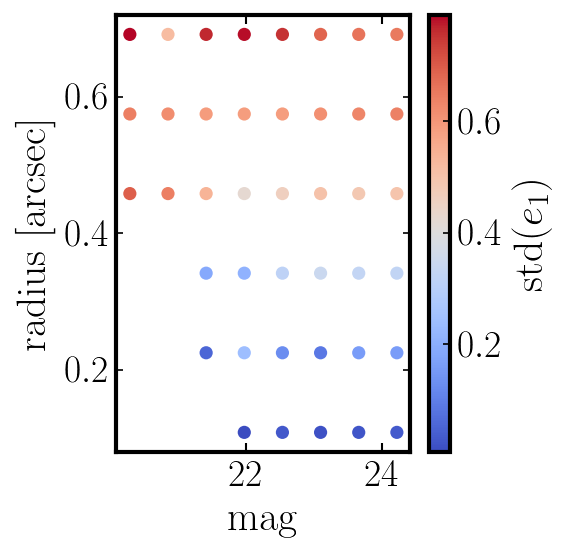

In [55]:
mag_edges = np.linspace(20.0, 24.5, 9)
radius_edges  = np.linspace(0.05,  0.75,  7)
x_array, y_array, z_array, n_array = xmod.estimate_std_in_bins(
    mag=mag, radius=np.sqrt(trace / 2.0), 
    obs=e1, mag_edges=mag_edges,
    radius_edges=radius_edges,
    min_count=50,
)
    
# --- make plot ---
cmap = "coolwarm"
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sc = ax.scatter(
    x_array,
    y_array,
    c=z_array,
    s=40,
    edgecolor="none",
    cmap=cmap,
)

ax.set_xlabel("mag")
ax.set_ylabel(r"radius [arcsec]")

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(r"$\mathrm{std}(e_1)$")

plt.tight_layout()

/tmp/ipykernel_31056/43214081.py:2: RuntimeWarning: invalid value encountered in sqrt
  mag=mag, radius=np.sqrt(trace / 2.0),


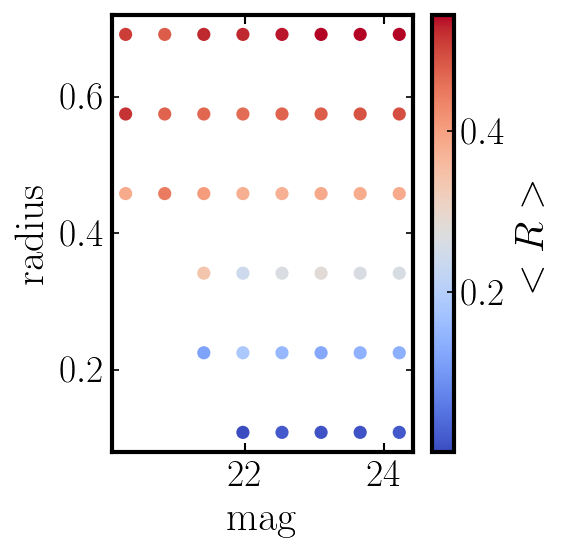

In [56]:
x_array, y_array, m_array, n_array = xmod.estimate_mean_in_bins(
    mag=mag, radius=np.sqrt(trace / 2.0), 
    obs=data["fpfs_de1_dg1"] * data["wsel"],
    mag_edges=mag_edges,
    radius_edges=radius_edges,
    min_count=50,
)
    
cmap = "coolwarm"
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sc = ax.scatter(
    x_array,
    y_array,
    c=m_array,
    s=40,
    edgecolor="none",
    cmap=cmap,
)

ax.set_xlabel("mag")
ax.set_ylabel(r"radius")

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(r"$<R>$")

plt.tight_layout()

In [57]:
from scipy.optimize import curve_fit

xdata = np.vstack([x_array, y_array])  
p0 = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  

popt, pcov = curve_fit(
    xmod.estd_model_fit,
    xdata,
    z_array / np.sqrt(m_array),
    p0=p0,
)

In [58]:
popt

array([ 8.47373731, -0.99380513,  8.58284123,  0.02295264, -5.19591804,
       -0.08234755])

In [59]:
z_array

array([0.69477101, 0.64229688, 0.79121761, 0.64114716, 0.61773611,
       0.5203616 , 0.05478654, 0.18805235, 0.53902613, 0.59165583,
       0.76534177, 0.00685451, 0.24199243, 0.20913219, 0.42394885,
       0.58723717, 0.78366201, 0.03043743, 0.1279524 , 0.31625329,
       0.46200274, 0.58621033, 0.75323364, 0.01896007, 0.08764752,
       0.34689669, 0.50261797, 0.61138066, 0.68545019, 0.02271138,
       0.15889897, 0.32789482, 0.48672288, 0.63140246, 0.66249227,
       0.03165107, 0.15785631, 0.32328964, 0.49838055, 0.63991569,
       0.65044675])

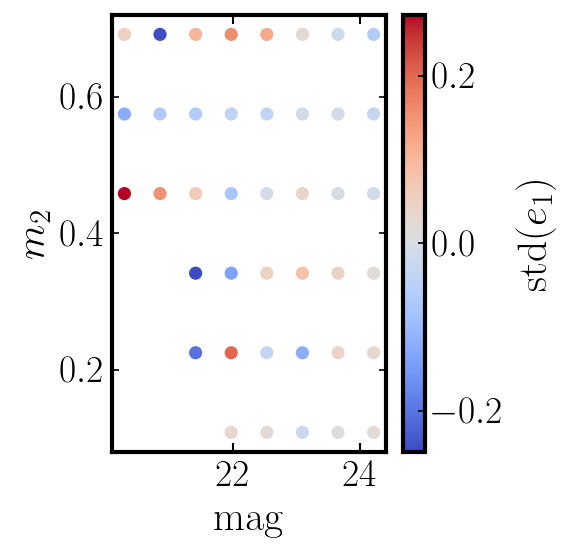

In [60]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sc = ax.scatter(
    x_array,
    y_array,
    c=z_array / np.sqrt(m_array) - xmod.estd_model_fit(xdata, *popt),
    s=40,
    edgecolor="none",
    cmap=cmap,
)

ax.set_xlabel("mag")
ax.set_ylabel(r"$m_2$")

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(r"$\mathrm{std}(e_1)$")

plt.tight_layout()

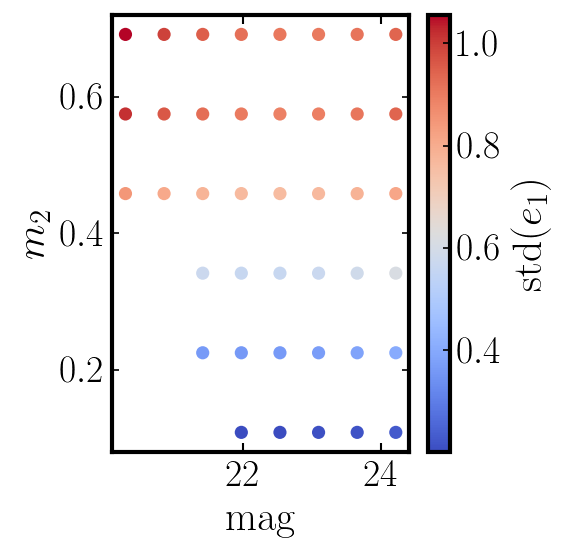

In [61]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sc = ax.scatter(
    x_array,
    y_array,
    c=xmod.estd_model_fit(xdata, *popt),
    s=40,
    edgecolor="none",
    cmap=cmap,
)

ax.set_xlabel("mag")
ax.set_ylabel(r"$m_2$")

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(r"$\mathrm{std}(e_1)$")

plt.tight_layout()

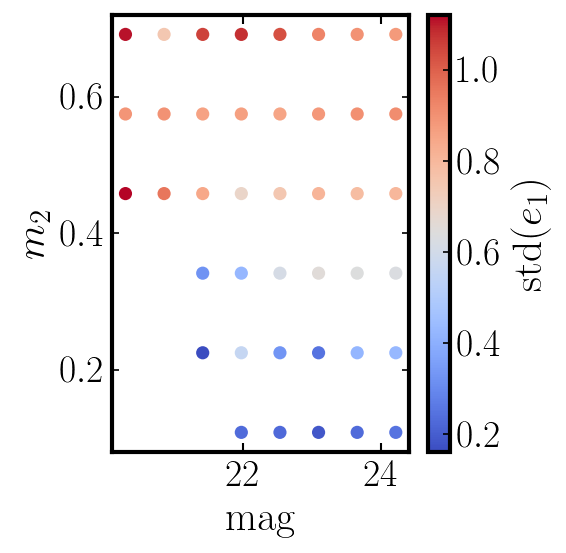

In [62]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
sc = ax.scatter(
    x_array,
    y_array,
    c=z_array / np.sqrt(m_array),
    s=40,
    edgecolor="none",
    cmap=cmap,
)

ax.set_xlabel("mag")
ax.set_ylabel(r"$m_2$")

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(r"$\mathrm{std}(e_1)$")

plt.tight_layout()

In [63]:
pars = np.array(popt)
wmod = w_model(
    data["i_flux"],
    data["fpfs_m0"],
    data["fpfs_m2"],
    mag_zero,
    *pars,
)
wopt = data["wsel"] * wmod
dwmod = w_model_derivs(
    data["i_flux"],
    data["fpfs_m0"],
    data["fpfs_m2"],
    mag_zero,
    *pars,
)
dwmod_dg1 = (
    dwmod["dw_dflux"] * data["i_dflux_dg1"] +
    dwmod["dw_dm0"] * data["fpfs_dm0_dg1"] +
    dwmod["dw_dm2"] * data["fpfs_dm2_dg1"]
)
dwmod_dg2 = (
    dwmod["dw_dflux"] * data["i_dflux_dg2"] +
    dwmod["dw_dm0"] * data["fpfs_dm0_dg2"] +
    dwmod["dw_dm2"] * data["fpfs_dm2_dg2"]
)

dw_dg1 = data["dwsel_dg1"] * wmod + dwmod_dg1 * data["wsel"]
dw_dg2 = data["dwsel_dg2"] * wmod + dwmod_dg2 * data["wsel"]
mask = mag < 24.5
R_t = np.nanmean((data["fpfs_e1"] * dw_dg1 + data["fpfs_de1_dg1"] * wopt)[mask])
print(R_t)
R_t = np.nanmean(( data["fpfs_de1_dg1"] * wopt)[mask])
print(R_t)
e1_t = (data["fpfs_e1"] * wopt / R_t)[mask]
print(np.nanstd(e1_t))

/work/xiangchong.li/superonionGW/code/image/xlens/xlens/catalog/model.py:24: RuntimeWarning: invalid value encountered in sqrt
  radius = np.sqrt(trace / 2.0)
/work/xiangchong.li/superonionGW/code/image/xlens/xlens/catalog/model.py:43: RuntimeWarning: invalid value encountered in sqrt
  radius = np.sqrt(trace / 2.0)


0.5679770841334523
0.6107335745049352
0.26860185559412475
